In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [10,55,80]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,5264,3683,5005,1057,2024,1130
2,7005,829,3009,430,610,529


<b>Question 1:</b> Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers. What kind of establishment (customer) could each of the three samples you've chosen represent?

<b>Answer 1:</b>

The first customer purchased far below the mean of Fresh, near the mean of Milk and Delicatessen, above the mean of Frozen and Detergents_Paper, and far above the mean of Grocery. This customer appears to be a
small market or corner store that sells mostly non-perishable items and frozen foods and has a deli counter where sandwiches are made, but does not have sell fresh produce.

The second customer purchased slightly below the mean in all categories, with Fresh at a slightly lower percentile than the others. Since this customer purchases about the average of what a wholesaler sells, this customer is likely another wholesaler or distibuter but with a smaller customer base.

The third customer purchased well below the mean (below 25th percentile) for Milk, Frozen, and delicatessen, and below the mean but closer to the 50th percentile for Fresh, Grocery, and Detergents_paper. This customer is likely a greengrocer or even an outdoor market that sells fresh produce and non-persihable items, but nothing that requires refrigeration.  

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'],axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size=0.25, random_state=18)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)

C:\Users\J\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
print score

0.704165920408


<b>Question 2</b>: Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?

<b>Answer 2</b>: I attempted to predict the 'Grocery' feature, which resulted in a prediction score of 0.704. This is a high score and implies that 70% of the variance in the 'Grocery' feature can be predicted from the other features. The 'Grocery' feature is therefore relatively less relevant because it is largely a measure of the other features. If the score was very close to 1, this feature could be dispensed with entirely, but I will retain it because it still provides some information independantly of the other features. 

C:\Users\J\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


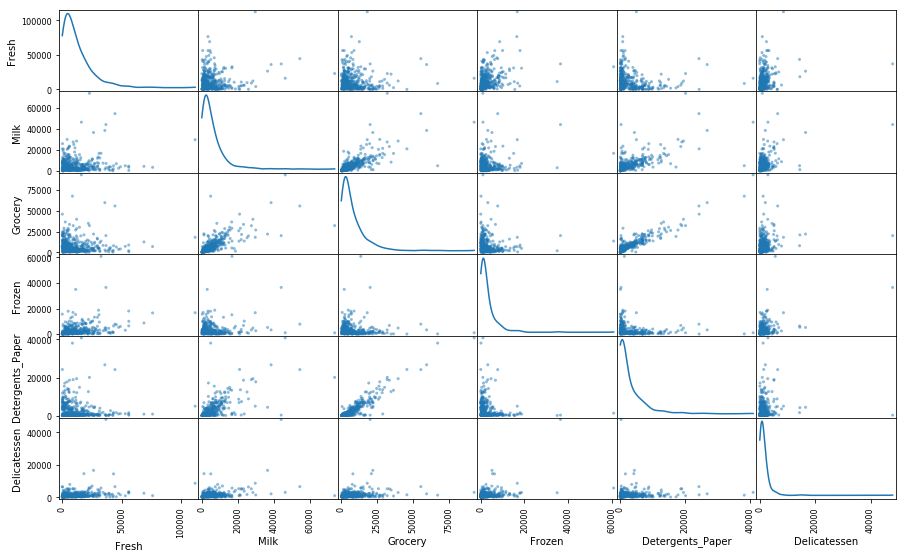

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.5, figsize = (15,9), diagonal = 'kde');

In [7]:
data.corr(method='pearson', min_periods=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<b>Question 3</b>: Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?

<b>Answer 3</b>: The dataset is concentrated about the maximum of the distribution (mode) for a given feature, with a small number of outliers at larger values. The width of the distribution about the mode is larger than the mode for all features, so there are still a large number of data points even as the feature value approaches zero. 

For all features, the mean is significantly higher than the median (50th percentile), meaning the small numbers of outliers at very large values are enough to shift the average. Because the mean and median do not coincide, and because the distribution is not symmetric about the mean, the data are not normally distributed.

Every feature has at least a correlation of approximately 0.4 with at least one other feature, the two largest correlations being Grocery-Milk and Grocery-Detergents_Paper. This confirms that some of the variance in the Grocery feature can be predicted with the others. However, the magnitude of correlation with the remaining features does not exceed 0.2, which confirms my prediction that the feature is still relevant overall. 

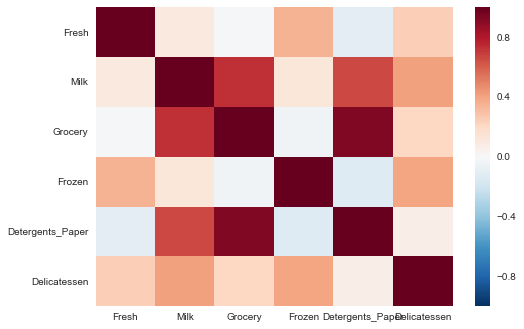

In [8]:
import seaborn as sns; sns.set()
sns.heatmap(data.corr(method='pearson', min_periods=1))

C:\Users\J\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


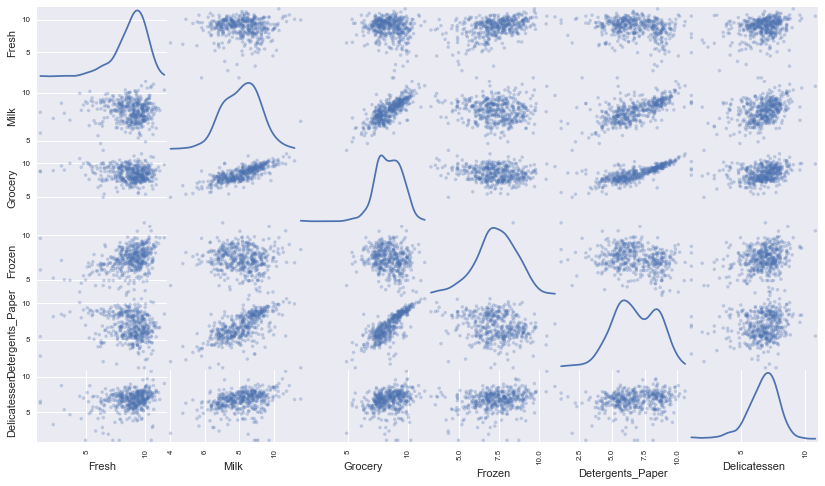

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [10]:
# Display a description of the dataset
display(log_samples.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,8.514835,7.842138,8.666086,7.138778,7.573988,6.921633
std,0.369401,0.990323,0.741810,1.172688,1.141603,0.603808
min,8.121480,6.720220,8.009363,6.063785,6.413459,6.270988
25%,8.345063,7.465852,8.263778,6.513488,7.013145,6.650481
50%,8.568646,8.211483,8.518193,6.963190,7.612831,7.029973
75%,8.711513,8.403096,8.994448,7.676275,8.154253,7.246955
max,8.854379,8.594710,9.470703,8.389360,8.695674,7.463937


In [11]:
outliers=pd.DataFrame(index=data.index,columns=data.columns)
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers[feature] = np.array(~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), dtype=int)
    # OPTIONAL: Select the indices for data poi)nts you wish to remove

#good_data = log_data.drop(log_data.index[outliers1]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [12]:
#Identify outliers that are present 

inters_corr = []
inters_all = []
inters_pairs = []
for i in data.columns:
    for l in np.where(outliers[i]==1)[0][:]:
        inters_all.append(l)
    for j in data.columns.drop(i):
        for k in np.intersect1d(np.where(outliers[j] == 1),np.where(outliers[i] == 1)):
            if (data.corr(method='pearson', min_periods=1)[i][j] < 0.95):
                inters_pairs.append(k)
            if (data.corr(method='pearson', min_periods=1)[i][j] < 0.7):
                inters_corr.append(k)
            else:
                print "Outliers for feature pairs with correlation greater than 0.7"
                print i,j,k
#good_data = log_data.drop(log_data.index[np.unique(inters)]).reset_index(drop = True)

Outliers for feature pairs with correlation greater than 0.7
Milk Grocery 154
Outliers for feature pairs with correlation greater than 0.7
Grocery Milk 154
Outliers for feature pairs with correlation greater than 0.7
Grocery Detergents_Paper 75
Outliers for feature pairs with correlation greater than 0.7
Detergents_Paper Grocery 75


In [13]:
print "All outliers:", np.unique(inters_all)

All outliers: [ 38  57  65  66  75  81  86  95  96  98 109 128 137 142 145 154 161 171
 175 183 184 187 193 203 218 233 264 285 289 304 305 325 338 343 353 355
 356 357 412 420 429 439]


In [14]:
print "Outliers for more than one feature:", np.unique(inters_pairs)

Outliers for more than one feature: [ 65  66  75 128 154]


In [15]:
print "Outliers for more than one feature with less than 0.7 correlation:", np.unique(inters_corr)

Outliers for more than one feature with less than 0.7 correlation: [ 65  66 128 154]


In [17]:
good_data = log_data.drop(log_data.index[np.unique(inters_corr)]).reset_index(drop = True)

<b>Question 4:</b> Are there any data points considered outliers for more than one feature based on the definition above?
Should these data points be removed from the dataset?
If any data points were added to the outliers list to be removed, explain why.
<br><br>
<b>Answer 4:</b> There are 5 data points that are outliers for more than one feature. Computationally, these data points should be removed if k-means clustering is used because the algorithm is highly sensitive to outliers. 

Conceptually, the outlier points should be removed if they represent buyers that do not fit in to any of the groups represented by the clustering of the rest of the data. We expect that the data points involve a combination of bias and variance. The probability that the outlier occurs in features A and B due to variance will involve the joint probability P(A=a,B=b) of the two features A, B taking values a,b respectively. Since outliers occur with small probability, both P(A=a) and P(B=b) are expected to be small individually. If the features are uncorrelated, then P(A=a;B=b) = P(A=a)P(B=b), which will be even smaller. On the other hand, if the features have a significant correlation then an outlier of both occurs more frequently than in the uncorrelated case. The small probability in the uncorrelated case means that the outliers are unlikely to be accounted for by the variance of the data, and may be due to bias. The higher probability in the correlated case means that either bias or variance may explain the outliers. 

Based on the previous analysis, outliers for more than one feature should only be rejected if those features have a small correlation- I chose an upper limit of 0.7. Of the 5 outliers, 2 belong to the highly correlated features Grocery/Milk and Grocery/Detergents_Paper. The Grocery/Milk point is also an outlier for the Delicatessen feature which has a smaller correlation with the others, and should be retained. This leaves 4 outliers for features with small correlations, which I have removed from the data set.

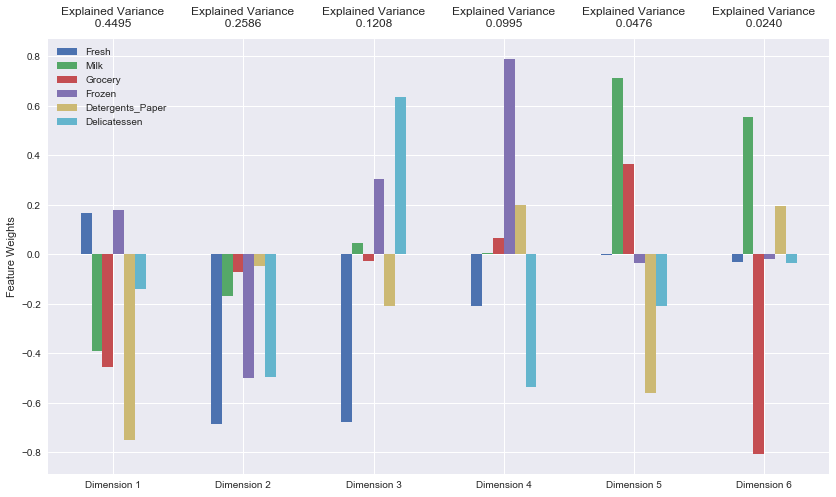

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca = pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [19]:
pca_results['Explained Variance']['Dimension 1'] + pca_results['Explained Variance']['Dimension 2']

0.70809999999999995

In [20]:
(pca_results['Explained Variance']['Dimension 1'] + pca_results['Explained Variance']['Dimension 2'] +
pca_results['Explained Variance']['Dimension 3'] + pca_results['Explained Variance']['Dimension 4'])

0.9284

<b>Question 5</b>: How much variance in the data is explained in total by the first and second principal component?
How much variance in the data is explained by the first four principal components?
Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

<br><br>
<b>Answer 5:</b> The first and second principal components explain 71% of the variance in the data, while the first four principal components explain 93% of the variance.

To understand the meaning of the components, it is helpful to group the features according to their largest correlations. If two groups are formed consisting of group 1 = (Milk, Grocery, and Detergents_Paper) and group 2 = (Fresh, Frozen), then:
<br>
-Each of the features in group 1 has its two greatest correlations with the other features<br>
-Each of the features in group 2 has its greatest or second greatest correlation with the other feature <br>
-The correlations within group 1 are larger than the correlations within group 2 <br>
-The remaining feature, Delicatessen, has its two greatest correlations in different groups.<br>

The first principal component has large negative wights on the members of group 1, smaller positive weights on the features in group 2, and the smallest weight on Delicatessen. This component can be thought of as representing mostly the group 1 features with a small negative contribution due to the group 2 features. Group 1 represents essential household items: non-perishable foods, Milk, and cleaning supplies, while group 2 represents foods that are more perishable, like fresh produce or items requiring freezing. These two types of buyers represent respectively, small grocery or convenience stores, and establishments that serve food. Thus this component represents spending on items by the first type of buyer, with more negative values representing greater spending.

The second principal component has small negative weights on group 1 items and large negative weights on group 2 items. Thus it is the reverse of component 1, representing spending by buyers who serve hot or fresh food, with more negative values representing more spending on these items.

The third component represents spending on both Delicatessen items without Fresh items, while the fourth component represents spending on both.

In [21]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.1095,-0.7088,0.8496,1.0130,-0.5589,-0.2222
1,-0.8324,0.0950,0.0682,-0.2550,-0.4334,0.1491
2,0.8763,1.0696,-0.6887,-0.8983,-0.8200,-0.4690


In [22]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca_r = PCA(n_components=2)
pca_r = pca_r.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca_r.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_r_samples = pca_r.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

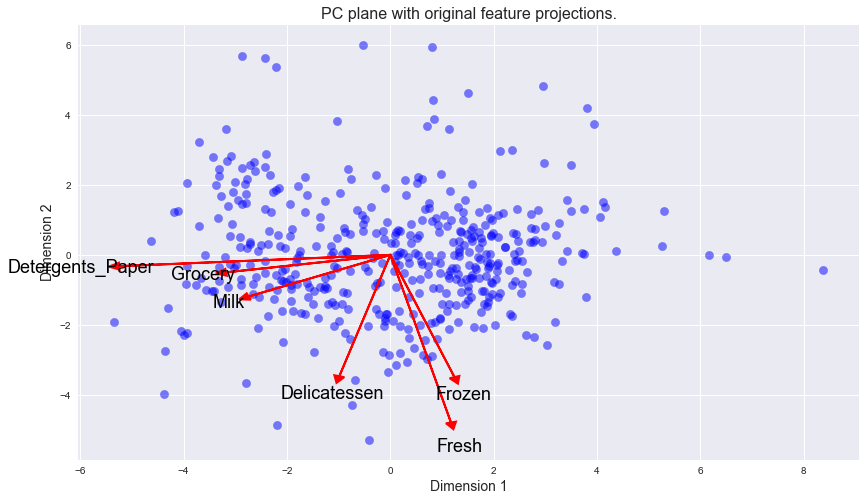

In [23]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

<b>Question 6</b>
What are the advantages to using a K-Means clustering algorithm?
What are the advantages to using a Gaussian Mixture Model clustering algorithm?
Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?


<b>Answer:</b> The advantage of the K-means clustering is that the algorithm is simple and computationaly efficient because it is based on hard clustering with a simple rule for cluster composition (points belong to the nearest cluster center), and only the sum of square distances to cluster centers are minimzed. 

The algorithm is fast because at each iteration, it only needs to calculate and store the (#  of clusters)(# of points) distances between each cluster and each point, and then the updated cluster composition, means, and sum of square differences can be computed from succesive operations on the (#  of clusters)(# of points) values. This aldo means that the complexity scales approximately linearly with the number of points, so K means is a good choice for large datasets.

K means does not account for differences in the shape or variance of the clusters,  which can be a drawback because the mean square distance is only a meaningful metric for circular (or isotropic in general) clusters with equal variance, as opposed to, for example, the square distances divided by a variance that may differ for each cluster and axis. However, this is also an advatnage bevcause the model only requires a single parameter, the cluster number. Since the algorithm is fast and it is usually possible to estimate an upper limit on the number of clusters (because clustering makes sense only when the number of clusters is much smaller than the number of data points), a grid search can potentially run through every possible cluster number find the absolute optimum model.

The Gaussian Mixture model has many advantages because it is a soft clustering method that allows for a general probability (i.e. other than 0 or 1) for a cluster to contain a given point, and calculates parameters for clusters by summing over all points weighted by the probability of membership in the cluster. Because the probabilities and cluster parameters change continuously with changes in the data points, the algorithm is much less sensitive to outliers than K means, where a small change in one point can shift its cluster and produce a big jump in the sum of square distances. Thus it is a good choice for overlapping clusters.

The probabilities for each point within a given cluster are assumed to be multivariate Gaussian (in the number of features) with respect to distance to the cluster center, which is advantageous because there are simple expressions for multivariate Gaussian probabilities even for correlated variables. This allows the model to be optimized with respect to both the mean and the covariance matrix, which allows for differences in the shape of each cluster. 

Although the covariance matrix greatly increases computational complexity and limits the speed and scaling of the algorithm, parameters can be chosen to simplify the calculation based on a qualitative understanding of the clusters. The calculation of the general covariance matrix can be thought of as a relaxing of the assumptions of the K means model (hard clustering, isotropy, equal variance), and these assumptions can be relaxed separately. Neglecting non-diagonal matrix elements is equiavlent to assuming that the feature axes are uncorrelated, but different values of the diagonal elements allow for clusters that are anisotropic (elongated in one dimension) and elliptical as opposed to circular. Setting the diagonal elements equal corresponds to the assumption of isotropy, but still allows for soft clustering and overlapping clusters. Finally, as the diagonal elements are made very small the cluster probabilities become negligible for all but the closest cluster, which reproduces the hard cluster grouping of K means. In Scikit-learn, the Gaussian Mixture algorithm has a parameter that controls the assumptions on the covariance matrix, each of which will reduce the computation time as compared to the full covariance matrix.

Since the dataset is small and the principal axes divide different types of buyers, I will use K means.

n_clusters =  2 ; score =  0.425103119239
n_clusters =  3 ; score =  0.394907706508
n_clusters =  4 ; score =  0.329424341628
n_clusters =  5 ; score =  0.351938675613
n_clusters =  6 ; score =  0.360859639283
n_clusters =  7 ; score =  0.362244116346


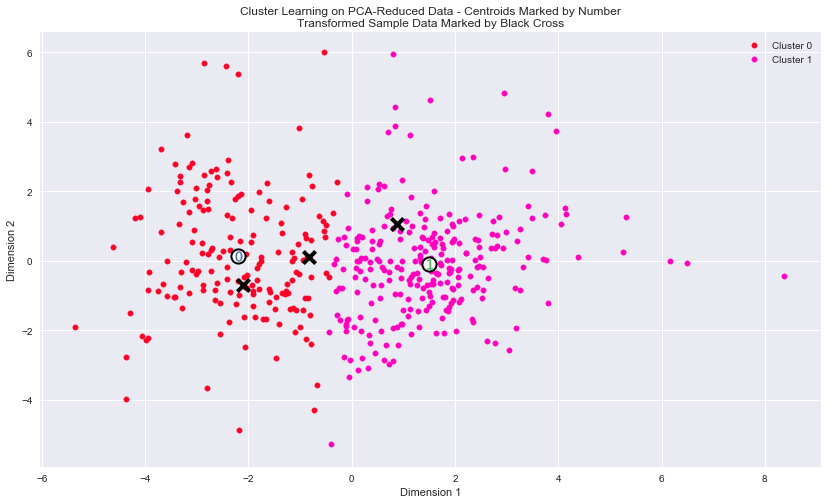

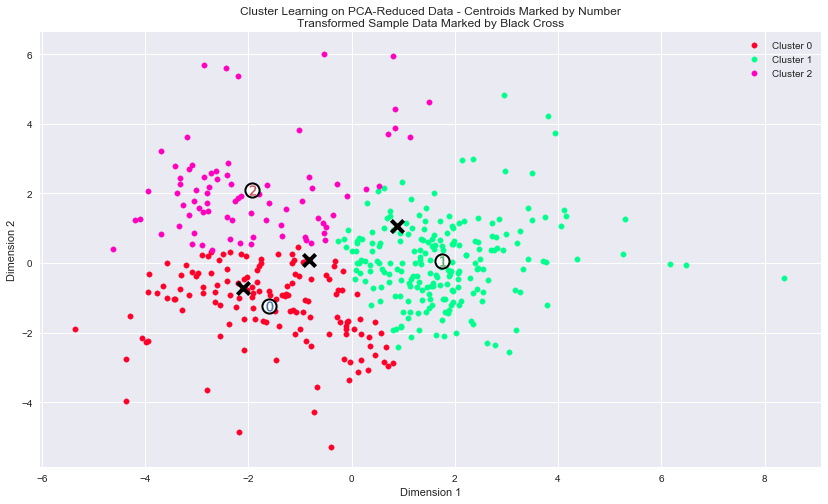

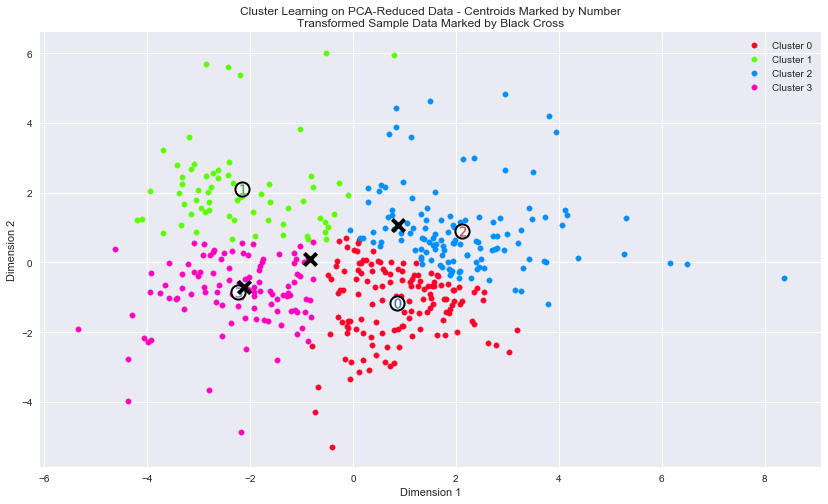

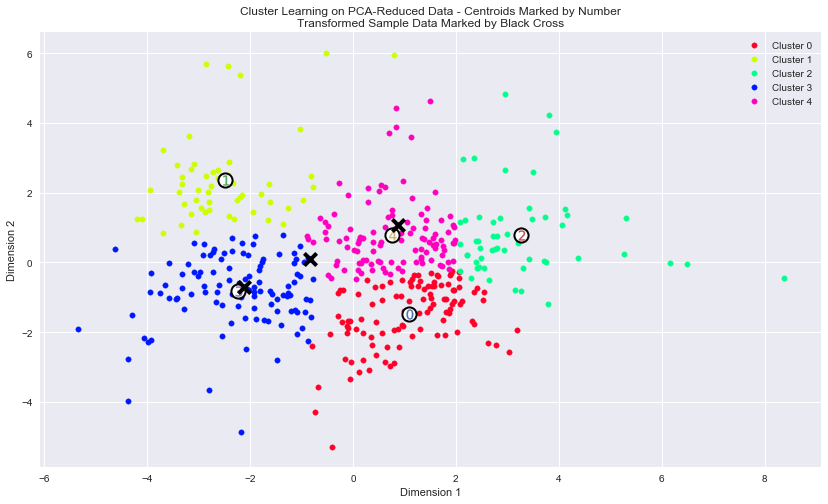

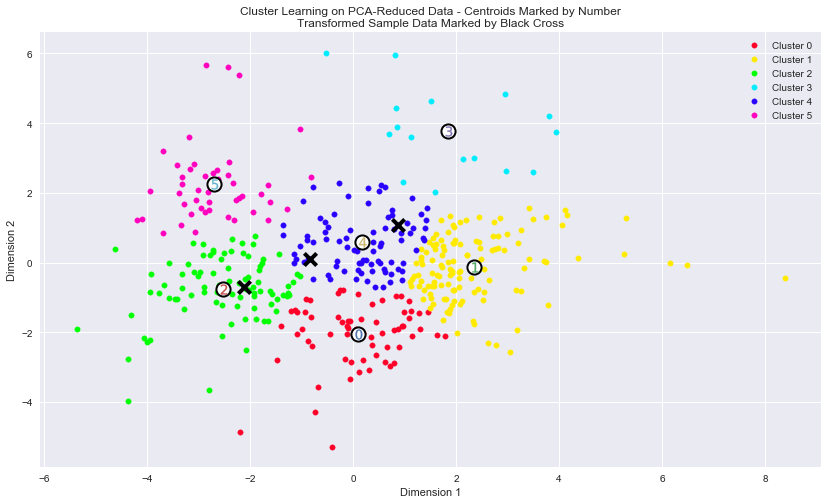

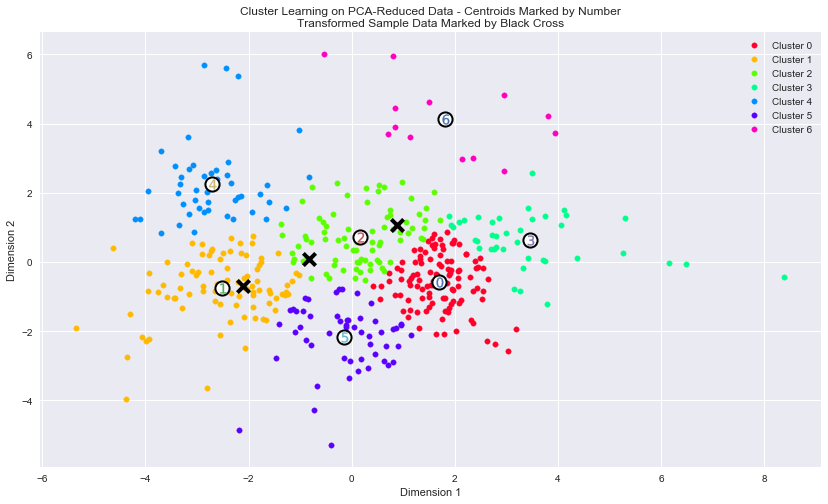

In [24]:
from sklearn.cluster import KMeans
from sklearn import metrics
# TODO: Apply your clustering algorithm of choice to the reduced data 
for n_clus in range(2,8):
    clusterer = KMeans(n_clusters = n_clus)
    clusterer.fit(reduced_data)
    #Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    #Find the cluster centers
    centers = clusterer.cluster_centers_
    #Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_r_samples)
    #Calculate the mean silhouette coefficient for the number of clusters chosen
    score = metrics.silhouette_score(reduced_data,preds)
    # Display the results of the clustering from implementation
    vs.cluster_results(reduced_data, preds, centers, pca_samples)
    print "n_clusters = ", n_clus, "; score = ", score

<b>Question 7:</b>
Report the silhouette score for several cluster numbers you tried.
Of these, which number of clusters has the best silhouette score?


<b>Answer 7:</b>
The best score is with n_clusters =  2 at 0.425103119239. For other cluster numbers:<br>
n_clusters =  3 ; score =  0.394907706508<br>
n_clusters =  4 ; score =  0.329424341628<br>

In [25]:
clusterer = KMeans(n_clusters = 2)
clusterer.fit(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_r_samples)

In [26]:
#Inverse transform the centers
log_centers = pca_r.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

In [27]:
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4027.0,7778.0,12437.0,958.0,4549.0,1023.0
Segment 1,8862.0,1913.0,2369.0,2086.0,289.0,688.0


<b>Question 8:</b>
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

<b>Answer 8:</b> Segment 0 has a purchase cost between the 25th and 50th percentile for features 'Fresh' and 'Frozen', between the 50th and 75th percentile for 'Delicatessen', and above the 75th percentule for 'Milk', 'Grocery', and 'Detergents_Paper'. This is consistent with a small corner store type of establishment that sells household essentials like non-perishable foods, Milk, deli meats, and soap, but does not carry fresh produce or anything that must be kept frozen.

Segment 1 has purchase costs between the 25th and 50th percentile for 'Delicatessen', 'Detergents_Paper', 'Grocery' and 'Milk, and between the 50th and 75th percentile for 'Frozen' and 'Fresh'. This is consistent with an eatery like a Pizzeria or sandwich shop that recieves fresh foods daily and has a freezer for storing meats and other items. 

<b>Question 9:</b>
For each sample point, which customer segment from Question 8 best represents it?
Are the predictions for each sample point consistent with this?*


<b>Answer 9:</b> 
Sample point 0 has above average costs for the essential household items and non-perishable goods and below average costs for the perishable items, which corresponds to segment 0.

Sample point 1 is the reverse, with higher costs for the perishable items, corresponding to segment 1.

Sample point 2 is near the mean for most features, so it seems lie in between the segments.

These predictions are basically accurate, but sample point 2 ends up falling in segment 1.

In [28]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


<b>Question 10:</b>
Companies will often run A/B tests when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively.
How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

<b>Answer 10:</b>
Having established that the clusters represent the difference between establishments that sell mostly non-perishable items and Milk, and those that prepare fresh food, it is likely that the latter type of establishment is more concered with keeping items fresh and quickly using goods as they are received. Obviously not all establishments in the same segment will want the exact same frequency of delivery, but it is reasonable to assume that on average the segment 1 businesses will want more frequenct deliveries than segment 0 businesses. 

In a simple A/B test, a population is split into tho groups and each is offered only one of the options A or B (3 or 5 delivery days). An outcome, like customer satisfaction (% of people satisfied with service), is measured for each group and the one with the better outcome determines whether A or B will be implemented in practice. In the simplest case, choice A is the existing value of the option and choice B is a change, so the group offered option A is the control and the group offered B is the testing group. Traditional statistical hypothesis testing is carried by comparing the difference in outcome between the groups and using the control group to establish the probability that the change in outcome can occur due to random chance. More complex models can be developed but the basic assumption is that there is or is not a statistically significant effect of changing the option on the whole population. 

For the segmented data considered here, we expect that for different clusters the random fluctuations (variance) in satisfaction and the real effect of the test (bias) will be different in magnitude and direction. The population-wide outcome of the test is an average over these differences and might miss a significant effect if the change in outcome from one cluster cancels out the change from another. Additionally, a single control group cannot distinguish between truly random fluctuations and those due to bias differences between the clusters. A better approach is to apply a separate test to each segment, 2 in this case, with separate control and testing groups in each cluster to remove the effect of bias. There is no garuantee that segments found by the clustering algorithm will be meaningful with respect to the difference in options A and B, but for this data set the non-perishable vs. fresh classification has direct relevance to the frequency of deliveries. Thus, the 2 A/B tests applied to the different clusters should allow the distributor to separate groups of buyers that respond positively to the change from those that do not.

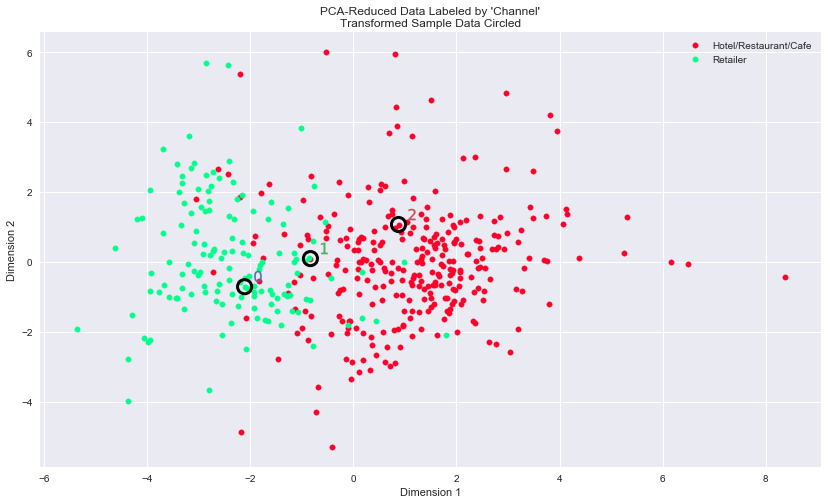

In [30]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, np.unique(inters_corr), pca_samples)

<b>Question 11:</b>How can the wholesale distributor label the new customers using only their estimated product spending and the customer segment data?


<b>Answer 11:</b> Once the clustering algorithm has been applied and optimized to sufficient accuracy, the cluster membership for each point can be treated as an outcome class and for the application of a supervised learning model. Since the optimal model has 2 clusters, a binary supervised learning algorithm can be applied. Since the clusters are close together, with some overlap, a logistic regression in the two principal components should fit the data well. This will produce a simple function for the probability that each point belongs to a particular segment, which can be applied to the new data.

<b>Question 12:</b>How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?
Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?

<b>Answer 12:</b> The groupings represented by the principal components in Question 5 (small grocery stores vs. establishments that serve fresh food) correspond qualitatively to Retailers and HoReCa respectively. Since the clusters mostly correspond to the same 2 groups, the clustering algorithm is a good fit to the actual two group distribution of Retailers and Horeca. Deviations from the clustering appear to result from the large variance of the HoReca class, which causes it to overlap with Retailers. This prevents the segments from being classified as either purely Retail or purely HoReCa, but the correspondance between cluster and actual class improves for points further from the cluster boundary.